In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [72]:
bbb_df = pd.read_csv('adenot_processed.csv')
#bbb_df.drop(bbb_df.iloc[:, 3:], inplace=True, axis=1)
bbb_df

,Drug,SMILES,permeable,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ACEBUTOLOL,CCCC(=O)Nc1ccc(c(c1)C(C)=O)OCC(O)CNC(C)C,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DACTINOMYCIN,CC(C)[C@H]1NC(=O)[C@@H](NC(=O)c2ccc(c3c2N=C2C(...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,ALDOSTERONE,C[C@@]12CCC(=O)C=C2CC[C@H]2C3CC[C@H](C(=O)CO)C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,AMILORIDE,N\C(=N)\NC(=O)c1nc(c(nc1N)N)Cl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AMIODARONE,CCCCc1oc2ccccc2c1C(=O)c1cc(c(c(c1)[I])OCCN(CC)...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,THEOBROMINE,Cn1cnc2c1C(=O)NC(=O)N2C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665,AMITRIPTYLINE,CN(C)CCC=C1c2ccccc2CCc2ccccc12,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1666,CHLORPROMAZINE,CN(C)CCCN1c2ccccc2Sc2ccc(cc12)Cl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1667,DISULFIRAM,CCN(CC)C(=S)SSC(=S)N(CC)CC,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
bbb_df[bbb_df['Drug'] == 'COBALAMINE']

,Drug,SMILES,permeable


## Getting Fingerprints

In [4]:
r = 2
d = 1024

fp_list = []
for smile in bbb_df['SMILES']:
    mol = Chem.MolFromSmiles(smile)
    if mol is None:
        print('invalid SMILES')
        bbb_df = bbb_df[bbb_df['SMILES'] != smile]
    else: 
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,r,nBits=d,useChirality=False)
        fp_list.append(fp)

morgan_list = np.array(fp_list)
print(morgan_list.shape)
print(bbb_df.shape)

(1669, 1024)
(1669, 3)


## K-Means Clustering

In [5]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(morgan_list)
cluster_index = kmeans.predict(morgan_list)

In [73]:
bbb_df.insert(3, 'Cluster_Index', cluster_index)
bbb_df

,Drug,SMILES,permeable,Cluster_Index,0,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ACEBUTOLOL,CCCC(=O)Nc1ccc(c(c1)C(C)=O)OCC(O)CNC(C)C,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DACTINOMYCIN,CC(C)[C@H]1NC(=O)[C@@H](NC(=O)c2ccc(c3c2N=C2C(...,0.0,0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,ALDOSTERONE,C[C@@]12CCC(=O)C=C2CC[C@H]2C3CC[C@H](C(=O)CO)C...,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,AMILORIDE,N\C(=N)\NC(=O)c1nc(c(nc1N)N)Cl,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AMIODARONE,CCCCc1oc2ccccc2c1C(=O)c1cc(c(c(c1)[I])OCCN(CC)...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,THEOBROMINE,Cn1cnc2c1C(=O)NC(=O)N2C,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665,AMITRIPTYLINE,CN(C)CCC=C1c2ccccc2CCc2ccccc12,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1666,CHLORPROMAZINE,CN(C)CCCN1c2ccccc2Sc2ccc(cc12)Cl,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1667,DISULFIRAM,CCN(CC)C(=S)SSC(=S)N(CC)CC,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [74]:
count = np.bincount(cluster_index)
index = np.arange(len(count))
number = [i for i in count]
percent = [round(100*i/len(cluster_index), 2) for i in number]
perc_perm = []

for i in index:
    bbb_i = bbb_df[bbb_df['Cluster_Index'] == i]
    num_perm = len(bbb_i[bbb_i['permeable'] == 1])
    perc_perm.append(num_perm/len(bbb_i))

cluster_df = pd.DataFrame(
    {'cluster_index': index,
    'number': number,
    'percentage': percent,
    'percent permeable': perc_perm
    }, index = None)

cluster_df

,cluster_index,number,percentage,percent permeable
0,0,247,14.80,0.497976
1,1,1127,67.53,0.922804
2,2,137,8.21,0.000000
3,3,158,9.47,0.981013


## Principal Component Analysis

In [8]:
dim = 100
pca = PCA(n_components=dim)
components = pca.fit_transform(morgan_list)

In [9]:
print("Overall Variance Captured by PCA-1 and PCA-2: ", sum(pca.explained_variance_ratio_[0:2]))
print("50 Principal Components Total Explained Variance: ", sum(pca.explained_variance_ratio_))
print("Fraction of Overall Variance Captured: ",  sum(pca.explained_variance_ratio_[0:2])/sum(pca.explained_variance_ratio_))

Overall Variance Captured by PCA-1 and PCA-2:  0.09688364723089951
50 Principal Components Total Explained Variance:  0.6525021004368076
Fraction of Overall Variance Captured:  0.14848020744460783


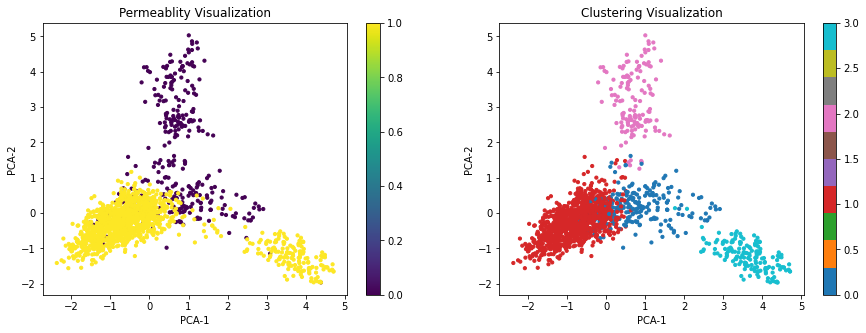

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(components[:,0], components[:,1], c=bbb_df['permeable'],s=10)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Permeablity Visualization')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(components[:,0], components[:,1], c=cluster_index,s=10, cmap='tab10')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Clustering Visualization')
plt.colorbar()

## t-SNE

In [11]:
tsne = TSNE(n_components=2, random_state=0)
t_components = tsne.fit_transform(components)

C:\Users\Jamie Wang\anaconda3\envs\bme590\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jamie Wang\anaconda3\envs\bme590\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


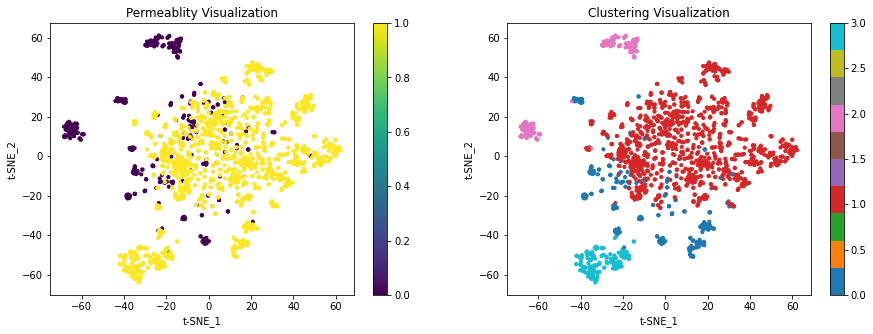

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(t_components[:,0], t_components[:,1], c=bbb_df['permeable'],s=10)
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.title('Permeablity Visualization')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(t_components[:,0], t_components[:,1], c=cluster_index,s=10, cmap='tab10')
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.title('Clustering Visualization')
plt.colorbar()

## Fragment Dictionary

In [56]:
## copied from xgboost model

important_features = [  64,  268,  881,  650,  926,  695,  726,  314,  656,  250,  893,
        147,  679,  294,  222,  875,   80,  283, 1019,  301,  389,  935,
         84,   36,  175,  121,    1,  557,  378,   15,   33,  967,  412,
       1017,  456,  932,  946,  128,  356,  739,  841,  512,  887,  130,
        285,  428,  714,  561,  226,  698,   90,  659,  973,  694,  114,
        231,  849,  547,  341,  816,  392,  333,  102,  904,  140,  807,
        486,  745,  367,  138,  578,  227,  673,  842,  233,  352,  767,
        753,  583,  897,  237,  407, 1005,  519,  116,  143,  197,  212,
        447,  255,  981,    0,  687,  464,  202,  872,  272,  399,  215,
        919,  829,  675,  722,  808,  299,  658,  606,  410,  723,  430,
        253,    5,  357,  463,  387]

top_10_weights = [0.025636112317442894,
 0.02843727357685566,
 0.029737655073404312,
 0.03191596642136574,
 0.03313911706209183,
 0.03845033794641495,
 0.05527280271053314,
 0.05980795994400978,
 0.0838354155421257,
 0.09129146486520767]

print(len(important_features))

115


In [63]:
def get_dictionary(smiles_set, feature_list, feature_weights):
    fragment_dict = {key: [val] for key, val in zip(feature_list, feature_weights)}
    r=2
    d=1024
    for smile in smiles_set:
        m = Chem.MolFromSmiles(smile)
        info={}
        fp = AllChem.GetMorganFingerprintAsBitVect(m,r,d,bitInfo=info)
        for bit in info.keys():
            if bit in feature_list:
                root_atom = info[bit][0][0]
                radius = info[bit][0][1]
                env = Chem.FindAtomEnvironmentOfRadiusN(m,radius,root_atom)
                amap={}
                submol=Chem.PathToSubmol(m,env,atomMap=amap)
                if amap:
                    fragment = Chem.MolToSmiles(submol, rootedAtAtom=amap[root_atom],canonical=False)
                else:
                    fragment = Chem.MolToSmiles(submol)
                if bit not in fragment_dict.keys():
                    fragment_dict[bit] = [fragment]
                elif fragment not in fragment_dict[bit]:
                    fragment_dict[bit].append(fragment)
        
    return fragment_dict

In [64]:
fragment_dict = get_dictionary(bbb_df['SMILES'], important_features[-10:], top_10_weights)

In [69]:
fragment_dict_df = pd.DataFrame.from_dict(fragment_dict, orient="index")
fragment_dict_df = fragment_dict_df.rename(columns={0:'Importance'})
fragment_dict_df.sort_values(by='Importance', ascending=False, inplace=True)
fragment_dict_df

,Importance,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
387,0.091291,N(C)C,[C@@H](C)(O)C,c(c(C)c)(cc)[N+]([O-])=O,c(cn)nc,C(CC)(=O)OC,C(OC)(=O)CC,C(C(=C)C)(O)=O,c(c(c)O)c(c)c,C(=CC)(C)C(=C)C,...,c(C(N)=O)(nc)c(n)C,None,None,None,None,None,None,None,None,None
463,0.083835,C(C)(O)C,c(cc)(cc)F,[C@H](C)(O)C,,c(c(c)O)(c(c)C)C(c)=O,c(c(C)c)(cc)Cl,c(c(C)n)c(c)c,[C@@H](N(C)c)(CC)[C@@H](C)N,C(=CC)C(C)(C)C,...,C(C)(C)(C)C,O(CC)C(=O)O,[C@@H](C)(S)C,n(C)(cn)c(c)c,None,None,None,None,None,None
357,0.059808,c(nc)(cc)c(c)n,C(N=C)#N,c(c(n)c)(cc)nc,O(C)C,C(C)(S)S,C(CC)C=C,s(c(N)n)c(c)c,[C@H](C[S+])(OC)[C@H](C)O,c(c(n)C)(c(n)N)CC,...,None,None,None,None,None,None,None,None,None,None
5,0.055273,C(N)(=O)C,[C@H](NC)(CC)C(=O)N,C(C)(=O)N,[C@@H](C(C)C)(O)CC,C(C)(=C)C,C(S)c,C(NC)(=O)N(C)C,c(C(C)=C)(cc)cc,O(C(C)=O)[C@@H](C)C,...,None,None,None,None,None,None,None,None,None,None
253,0.038450,C(C)(C)C,n(c(c)c)(cc)C(C)C,C(=N/C)\N(C)C,C(=C(S)C)(N(C)C)C(O)=O,[C@@H](OC)([C@@H](C)C)[C@](C)(O)C,C(c(c)c)(=O)C(=C)C,C(C(C)=C)(=O)c(c)c,C(C(=C)C)(=O)c(c)c,C(CN)(N)=O,...,c(cc)(c(c)O)OC,C(CN)NC,n(cc)(C(C)C)c(c)c,c(cc)(c(O)c)OC,[C@@H](CC)(SC)[C@@H](N)C,None,None,None,None,None
430,0.033139,C(CO)(O)CN,C(C)C,C(CN)(O)CO,[C@H](C)(O)[C@H](C)C,[C@H]([C@H](C)C)(C)O,[C@@H](C)(O)[C@H](C)C,c(c(c)O)c(Cl)c,C(CN)Cc,C(Cc)CN,...,None,None,None,None,None,None,None,None,None,None
723,0.031916,c(c)(c)-c,c(c)(C)c,C(c(c)c)([C@H](C)C)c(c)c,c(c(c)c)(c(F)c)C,c(c)(c)C,C(CN)O,N1(C(=C)C)[C@H](S)CC1=O,c(-c)(c)c,c(C)(c)c,...,C(F)(F)O,c(N(C)C)(cn)nc,c(cc)(cc)Cl,c(c)(-c)c,N(C(C)(C)C)(CC)C(C)N,C(C(C)(C)C)C(C)(C)C,None,None,None,None
410,0.029738,[C@H]1(CN)N[C@H]1C,C(C(N)=O)(=CC)C,c([C@H](C)O)(cc)cc,c(C(C)O)(cc)cc,c(c(C)c)(c(c)O)C(=O)C,C(=CC)(C)C(=O)N,O(CC)C(c)C,c(cc)(cc)[C@H](O)C,C(N(C)C)(c(c)c)c(c)c,...,[nH](c(c)C)c(c)C,c(cc)(cc)C(O)C,c(n(-c)c)(nc)C,c(C)(nc)n(c)-c,C(CN)(C)(C)c(c)c,None,None,None,None,None
606,0.028437,C(C)N,c(C(O)=O)(cc)cc,C(N)C,[C@@H](CC)(O)[C@H](C)N,C(C[N+])CC,s(c(N)n)c(c)C,C(Cc)S(O)(=O)=O,C(C)(O)(C)C,c(cc)(c(c)O)NC,...,C(=O)(N(C)C)c(c)n,O(C(C)C)C(N)=O,O(C(C)C)C(=O)N,C([C@@H](C)C)CO,C(=C(C)N)CC,c(C(=O)O)(cc)cc,C(C(C)(C)C)OC,c(c([n+])-c)(cc)c(c)c,C(OC)C(C)(C)C,C(NC)(=S)NC
658,0.025636,C(Oc)C(O)C,c(cc)(c(c)C)-c(c)c,C(C)(C)(C)NC,C(C(C)O)Oc,C(NC)(C)(C)C,c(c(C)n)sc,C(C(O)=O)(CO)c(c)c,C(NC)(=O)C(C)(C)O,N(C(C)=O)CC,...,C(C(C)(O)C)(=O)C(=C)C,[C@@H](C(O)=O)(CO)c(c)c,O(C(=C)C)C(c)(c)N,C(C)(O)O,None,None,None,None,None,None


In [87]:
disp_f0 = '387'
disp_f1 = '463'
disp_f2 = '357'
disp_f3 = '5'

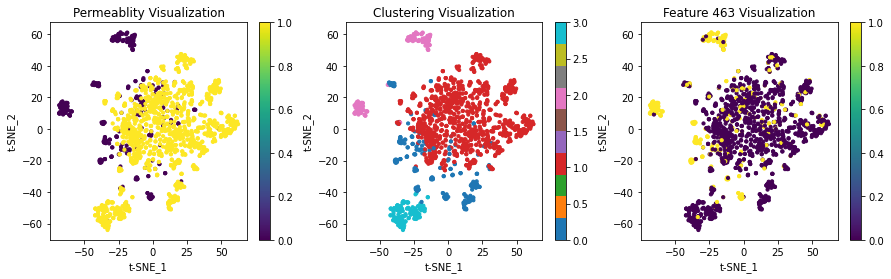

In [103]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(t_components[:,0], t_components[:,1], c=bbb_df['permeable'],s=10)
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.title('Permeablity Visualization')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(t_components[:,0], t_components[:,1], c=bbb_df['Cluster_Index'],s=10, cmap='tab10')
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.title('Clustering Visualization')
plt.colorbar()

has_feature = ( (bbb_df[disp_f0]==1) | (bbb_df[disp_f1]==1) |
                (bbb_df[disp_f2]==1) | (bbb_df[disp_f3]==1) )

plt.subplot(1, 3, 3)
plt.scatter(t_components[:,0], t_components[:,1], c=has_feature,s=10)
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.title('Feature {} Visualization'.format(display_feature))
plt.colorbar()

## Get Fragments By Cluster
### + Scaffold Analysis

In [13]:
from rdkit.Chem import (
    AllChem,
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys
)

In [15]:
def get_fragments(smiles_set, feature_list):
    fragments_df = pd.DataFrame(columns=['Fragment', 'Count'])
    r=2
    d=1024
    for smile in smiles_set:
        m = Chem.MolFromSmiles(smile)
        info={}
        fp = AllChem.GetMorganFingerprintAsBitVect(m,r,d,bitInfo=info)
        fragments = []
        for bit in info.keys():
            if bit in feature_list:
                root_atom = info[bit][0][0]
                radius = info[bit][0][1]
                env = Chem.FindAtomEnvironmentOfRadiusN(m,radius,root_atom)
                amap={}
                submol=Chem.PathToSubmol(m,env,atomMap=amap)
                if amap:
                    fragment = Chem.MolToSmiles(submol, rootedAtAtom=amap[root_atom],canonical=False)
                else:
                    fragment = Chem.MolToSmiles(submol)
                fragments.append(fragment)
        
        for fragment in fragments:
            if fragment in fragments_df['Fragment'].values:
                index = fragments_df.index[fragments_df['Fragment'] == fragment]
                fragments_df.at[index[0],'Count'] = fragments_df.at[index[0],'Count'] + 1
            else:
                row = {'Fragment': [fragment], 'Count': [1]}
                row_df = pd.DataFrame(data=row)
                fragments_df = pd.concat([fragments_df, row_df], ignore_index=True)
    return fragments_df

In [30]:
def cluster_fragments(cluster_df, features):
    fragments = get_fragments(cluster_df['SMILES'], features)
    fragments = fragments.sort_values(by=['Count'], ascending=False)[1:]
    mol = [Chem.MolFromSmiles(s) for s in cluster_df['SMILES'].values[:10]]
    grid = Draw.MolsToGridImage(
        mol, 
        molsPerRow=5, 
        subImgSize=(300, 300), 
        legends=cluster_df['Drug'].values.tolist()[:10]
    )
    return fragments, grid

### Cluster 0

In [31]:
fragments_c0, grid_c0 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 0], important_features[-50:])

In [34]:
fragments_c0.head(20)

,Fragment,Count
9,OC,147
18,O(C)C,136
10,C(C)C,104
17,c(c)(c)O,95
20,Oc,87
19,C(C)(O)C,76
4,c(c)(c)C,75
13,c(C)(c)c,58
76,N(C)(C)C,52
24,NC,49


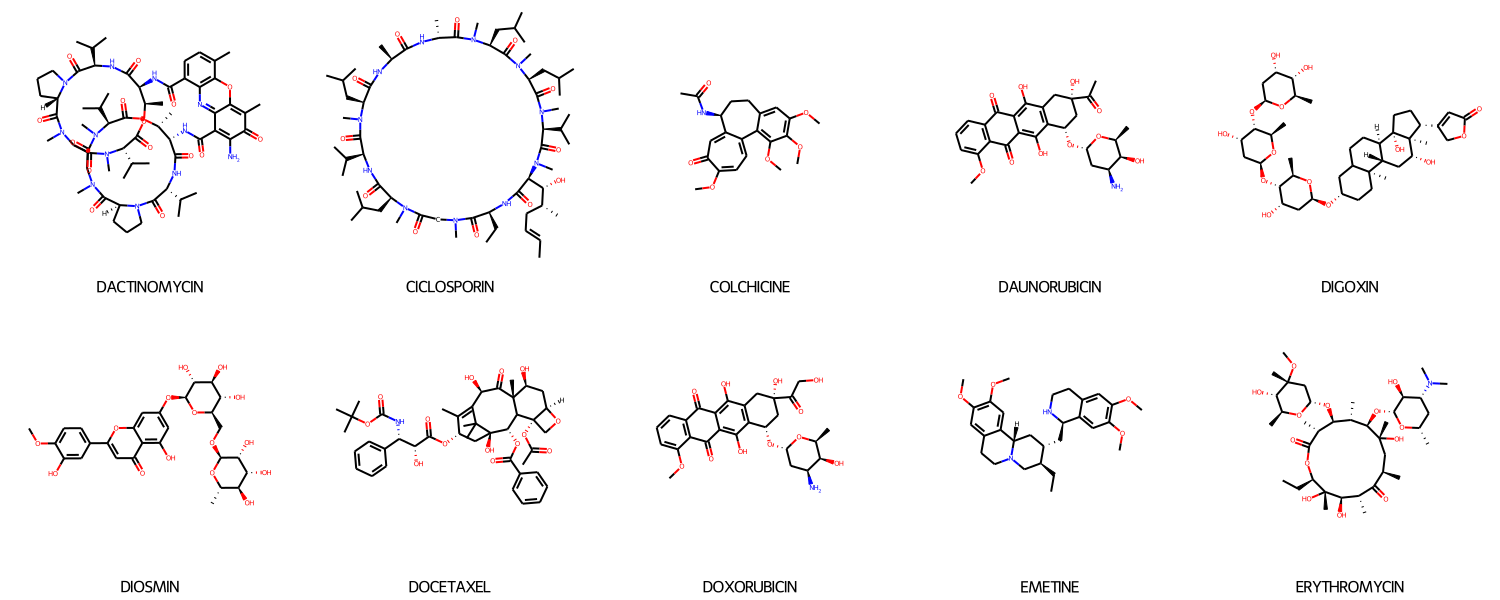

In [32]:
grid_c0

### Cluster 1

In [35]:
fragments_c1, grid_c1 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 1], important_features[-50:])

In [36]:
fragments_c1.head(20)

,Fragment,Count
8,N(C)(C)C,244
39,c(C)(c)c,179
0,OC,95
56,C(C)C,92
100,c(c)(C)c,79
16,N(C)C,79
23,c(c)(c)C,61
80,c(c(C)c)cc,61
15,c(c)n,54
34,N(C)(C)c,44


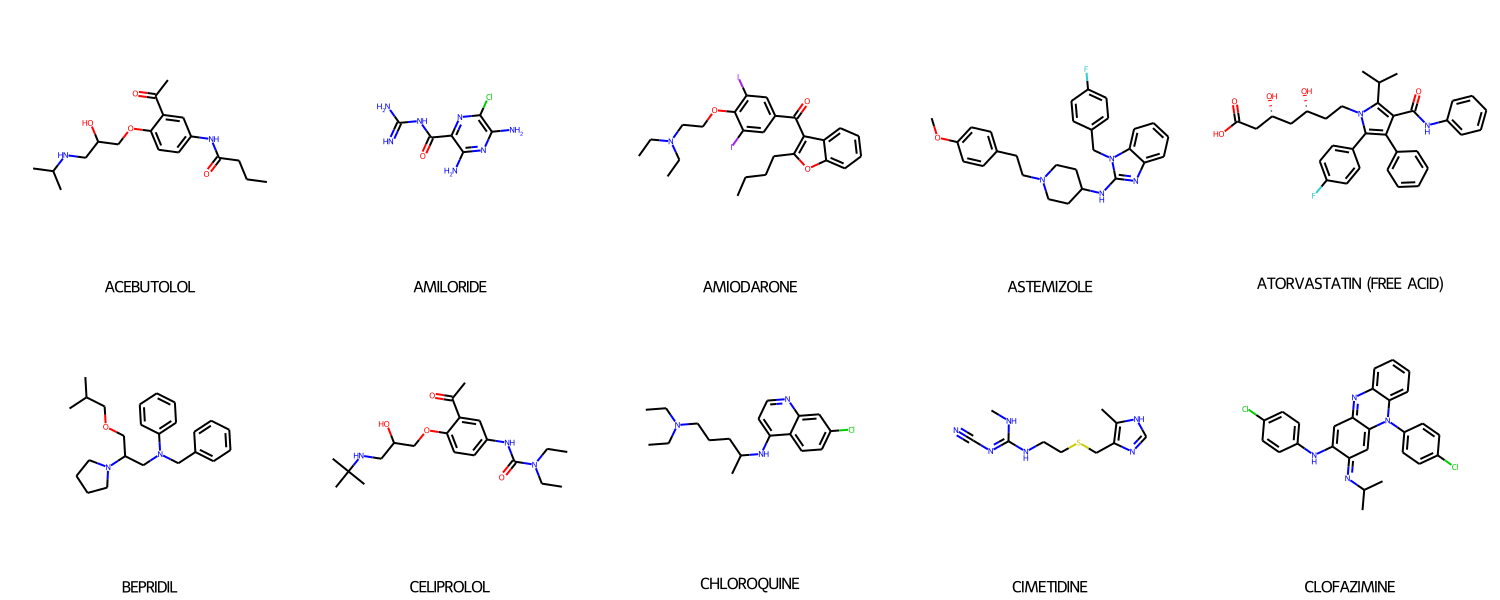

In [37]:
grid_c1

### Cluster 2

In [38]:
fragments_c2, grid_c2 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 2], important_features[-50:])

In [39]:
fragments_c2

,Fragment,Count
4,N(C)C,132
6,[C@H]1(NC)[C@@H](S)NC1=O,107
7,C(C)(=O)N,76
8,[C@@H](C)(N)C,64
0,C(N)(=O)C,62
...,...,...
80,FC,1
81,[C@H](C)(N)C,1
82,[C@H](S)(C)N,1
83,C(NC)(=O)C(C)(C)O,1


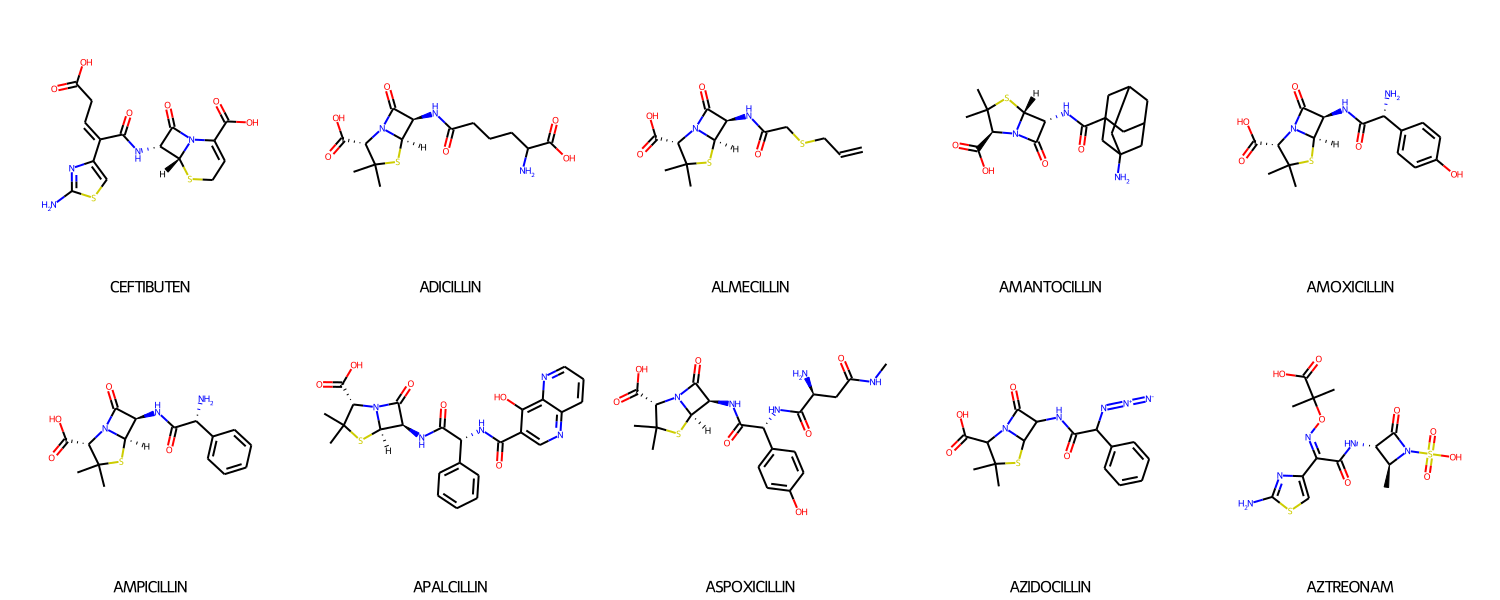

In [40]:
grid_c2

### Cluster 3

In [41]:
fragments_c3, grid_c3 = cluster_fragments(bbb_df[bbb_df['Cluster_Index'] == 3], important_features[-50:])

In [43]:
fragments_c3.head(20)

,Fragment,Count
2,OC,141
8,C(C)(C)(C)C,84
7,[C@H](C)(C)C,76
1,C(C)C,67
3,C(C)(C)C,66
16,[C@@H](CC)(F)C(=C)C,40
9,[C@@H](C)(C)C,16
14,[C@H]([C@H](C)C)(C(C)(C)C)[C@@H](O)C,8
11,O(C)C,6
6,C(C(C)=O)O,6


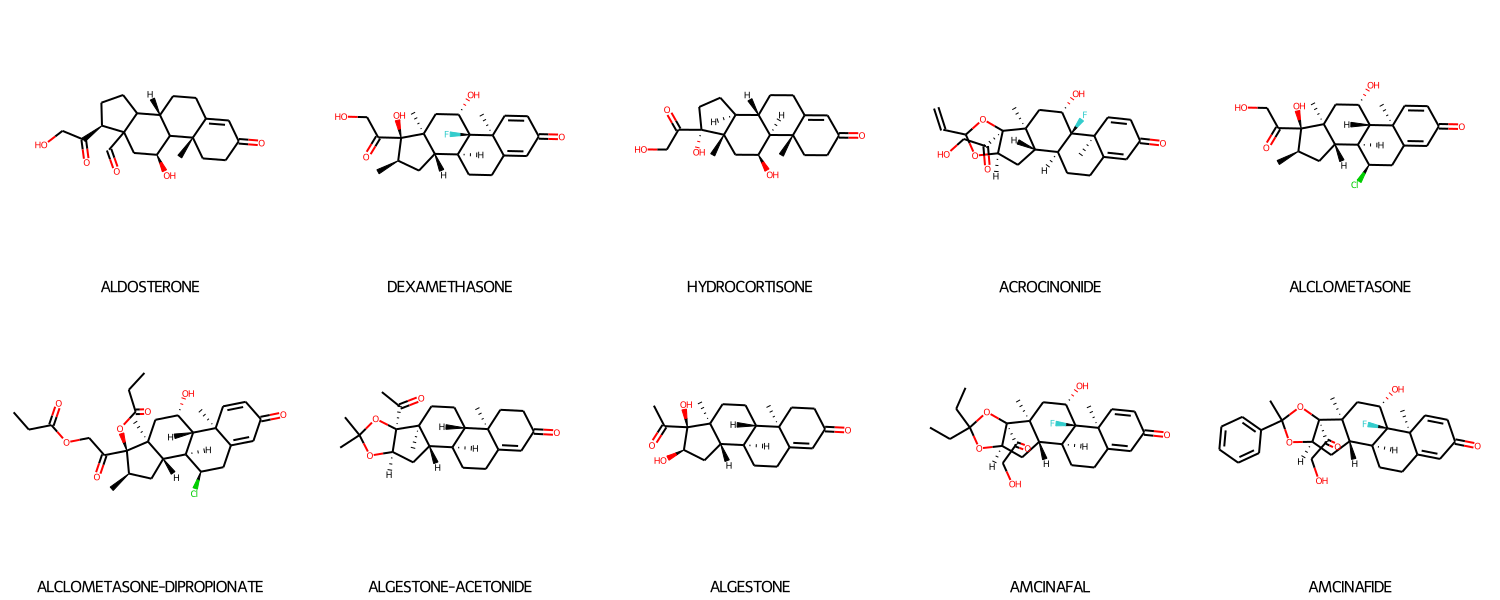

In [44]:
grid_c3